**CardioPredict: AI-Powered Heart Disease Prevention**


In [ ]:
# @title
""" # 🧩 Setup: Create project folders
import os
os.makedirs('data', exist_ok=True)
os.makedirs('notebooks', exist_ok=True)
os.makedirs('images', exist_ok=True)
open('README.md', 'w').close()


SyntaxError: incomplete input (ipython-input-2293726589.py, line 2)

In [3]:
# @title
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**EDA**

In [9]:
# ==========================================================
# Step 1: Load data and quick overview
# ==========================================================
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/DsProjects/CardioPredict/data/raw/heart_disease_uci.csv')

# Quick look at first and last 5 rows
print(df.head())
print(df.tail())

# Dataset shape
print("Dataset shape:", df.shape)

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check data types and missing values
print(df.info())

# Summary statistics for numeric columns
print(df.describe())

# Key insight comments:
# - Dataset has 920 rows and 16 columns.
# - No obvious missing values yet (except possibly coded as zeros in certain columns).
# - Numeric features like 'age', 'trestbps', 'chol', 'thalch', 'oldpeak' will need distribution checks.
# - Target variable is 'num'; will convert to binary target next.


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
      id

Dataset shape: (920, 16)

Summary statistics:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  


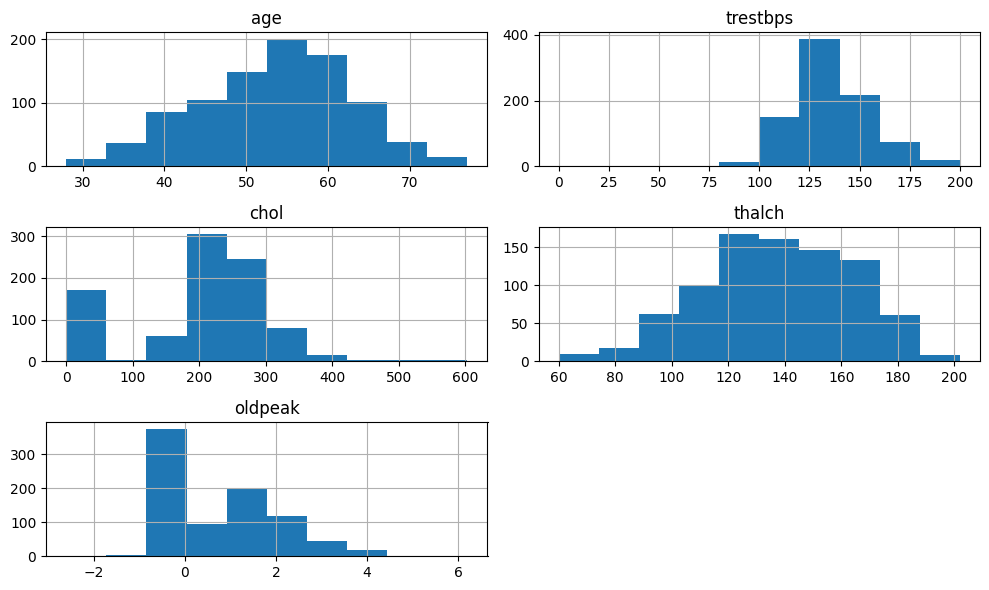

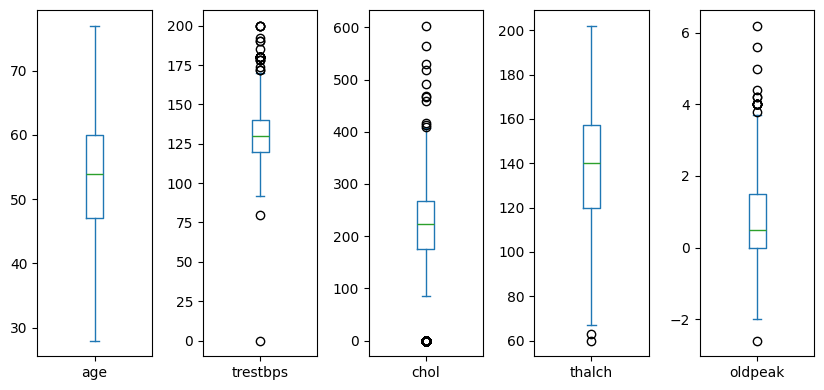

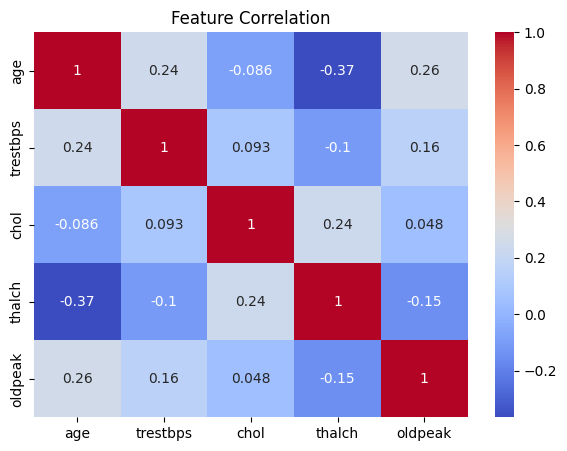

In [10]:
# ==========================================================
# Step 2: Initial exploratory data analysis
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print("Dataset shape:", df.shape)
print("\nSummary statistics:")
print(df.describe())

# ---------------- Histograms ----------------
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak'] # "ca" was dropped
df[numeric_cols].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

# ---------------- Boxplots ----------------
df[numeric_cols].plot(kind='box', subplots=True, layout=(1,6), figsize=(10,4), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

# ---------------- Correlation heatmap (numeric) ----------------
plt.figure(figsize=(7,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Key insights:
# - Age, trestbps, chol, thalch, oldpeak, and ca are numeric features for modeling.
# - Some features (chol, trestbps, oldpeak) show potential outliers and skewness.
# - Correlation shows moderate relationships among numeric features; helps detect multicollinearity.


In [11]:
# ==========================================================
# Step 3: Convert target and handle impossible zero values
# ==========================================================

# Convert 'num' to binary target: 0 = no disease, 1 = disease
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop original 'num' column
df = df.drop(columns=['num'])

# Confirm new target distribution
print(df['target'].value_counts())
print("\nTarget distribution (%):")
print(df['target'].value_counts(normalize=True) * 100)

# Identify impossible zero entries in key numeric features
# 'trestbps', 'chol', 'thalch' cannot realistically be zero
print("\nNumber of Zeros:")
for col in ['trestbps', 'chol', 'thalch']:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")

# Missing values before zero-replacement
print("\nMissing values before zero-replacement:")
print(df[['trestbps', 'chol']].isna().sum())

# Replace zeros in 'trestbps' and 'chol' with NaN (to be imputed later)
df[['trestbps', 'chol']] = df[['trestbps', 'chol']].replace(0, np.nan)

# Verify replacement
print("\nMissing values after zero-replacement:")
print(df[['trestbps', 'chol']].isna().sum())

# Key insights:
# - Binary target simplifies classification.
# - Some rows have impossible zero values for blood pressure/cholesterol → need imputation.
# - Early handling prevents these anomalies from biasing models.


target
1    509
0    411
Name: count, dtype: int64

Target distribution (%):
target
1    55.326087
0    44.673913
Name: proportion, dtype: float64

Number of Zeros:
trestbps: 1 zeros
chol: 172 zeros
thalch: 0 zeros

Missing values before zero-replacement:
trestbps    59
chol        30
dtype: int64

Missing values after zero-replacement:
trestbps     60
chol        202
dtype: int64


In [12]:
# ==========================================================
# Step 4: Impute missing values & encode categorical variables
# ==========================================================

# ---------------- Numeric columns ----------------
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak'] # "ca" was removed
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())  # assign back

# ---------------- Categorical columns ----------------
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in cat_cols:
    mode_val = df[col].mode()
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val.iloc[0])  # safe assignment
    else:
        # If mode is empty (all NaNs), fill with a placeholder
        df[col] = df[col].fillna("Unknown")

# ---------------- Binary encoding ----------------
# Map binary categorical columns to 0/1
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})

# Multi-category columns ('cp', 'restecg', 'slope', 'thal')
# will be one-hot encoded later inside the pipeline to avoid data leakage

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isna().sum())

# Confirm encoding
print("\nSample of encoded dataset:")
print(df.head())

# Key insights:
# - Median/mode imputation ensures no missing data disrupts model training.
# - Binary encoding is applied immediately; multi-category encoding deferred to pipeline.
# - Dataset is now clean and ready for transformations in modeling.



Missing values after imputation:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca          611
thal          0
target        0
dtype: int64

Sample of encoded dataset:
   id  age  sex    dataset               cp  trestbps   chol  fbs  \
0   1   63    1  Cleveland   typical angina     145.0  233.0    1   
1   2   67    1  Cleveland     asymptomatic     160.0  286.0    0   
2   3   67    1  Cleveland     asymptomatic     120.0  229.0    0   
3   4   37    1  Cleveland      non-anginal     130.0  250.0    0   
4   5   41    0  Cleveland  atypical angina     130.0  204.0    0   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0      0      2.3  downsloping  0.0   
1  lv hypertrophy   108.0      1      1.5         flat  3.0   
2  lv hypertrophy   129.0      1      2.6         flat  2.0   
3 

/tmp/ipython-input-19214279.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(mode_val.iloc[0])  # safe assignment


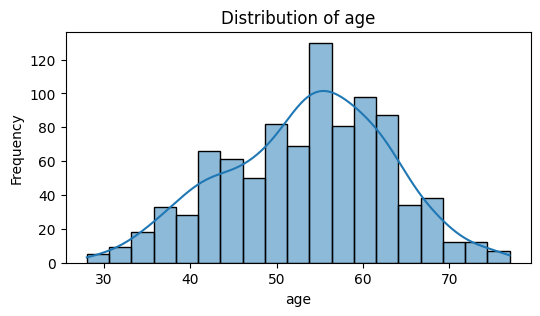

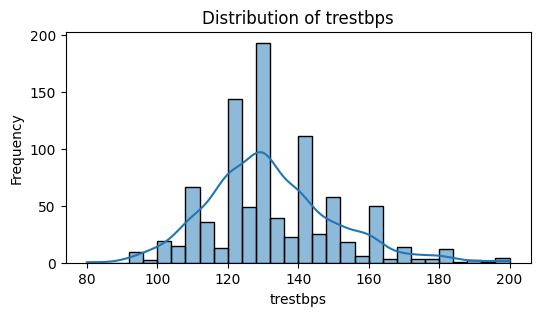

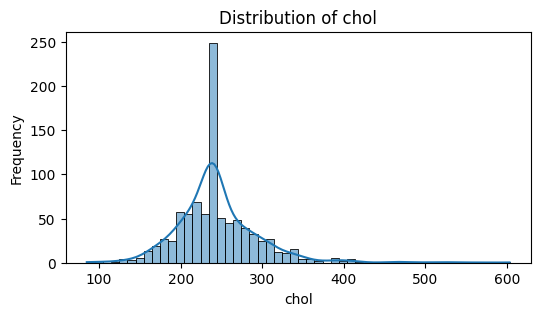

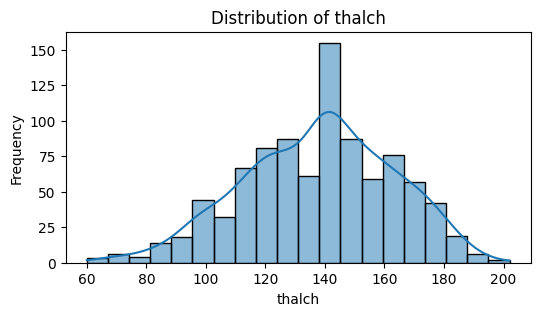

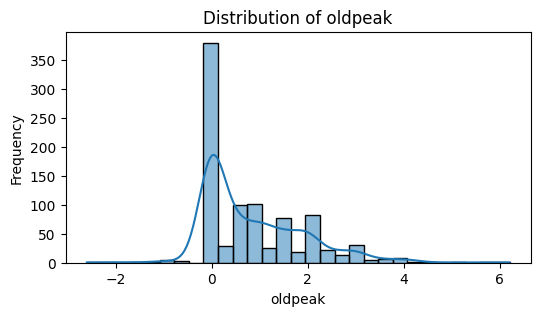


Skewness after corrections:
chol        0.333047
trestbps    0.517835
oldpeak     0.282064
dtype: float64


In [13]:
# ==========================================================
# Step 5: Feature distributions, skewness, and outlier capping
# ==========================================================

# Numeric columns to inspect
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak'] # "ca" was dropped

# ---------------- Distribution plots ----------------
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# ---------------- Outlier capping ----------------
# Cholesterol (chol) is moderately right-skewed → cap extreme high values
df['chol'] = df['chol'].clip(upper=df['chol'].quantile(0.975))

# Resting blood pressure (trestbps) may have rare extreme values → cap
df['trestbps'] = df['trestbps'].clip(upper=df['trestbps'].quantile(0.99))

# Oldpeak should not have negative values → set negatives to 0
df['oldpeak'] = np.where(df['oldpeak'] < 0, 0, df['oldpeak'])

# ---------------- Skewness correction ----------------
# Apply square-root transformation to oldpeak to reduce right-skew
df['oldpeak'] = np.sqrt(df['oldpeak'])

# Check skewness after transformations
print("\nSkewness after corrections:")
print(df[['chol','trestbps','oldpeak']].skew())

# Key insights:
# - Capping extreme values reduces distortion from outliers without removing data.
# - Square-root transform of 'oldpeak' reduces right skewness and makes the distribution closer to normal.
# - A log transform was tested but the square-root yielded better normality (final skew ≈ 0.282).
# - These corrections improve model stability and reduce influence of extreme values.


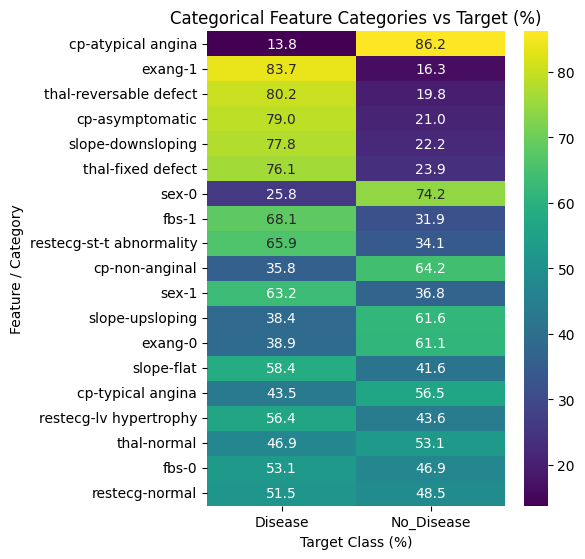

In [14]:
# ==========================================================
# Step 6: Explore categorical features vs target
# ==========================================================

categorical_features = [
    'sex', 'fbs', 'exang', 'cp', 'restecg', 'slope', 'thal'
]

heatmap_rows = []
heatmap_values = []
strengths = []

# Compute % disease/no-disease and strength
for col in categorical_features:
    crosstab = pd.crosstab(df[col], df['target'], normalize='index') * 100
    counts = pd.crosstab(df[col], df['target'])

    # Ensure both columns exist
    for val in [0, 1]:
        if val not in crosstab.columns:
            crosstab[val] = 0
            counts[val] = 0

    crosstab = crosstab.rename(columns={0: "No_Disease", 1: "Disease"})
    counts = counts.rename(columns={0: "No_Disease", 1: "Disease"})

    for category in crosstab.index:
        row_name = f"{col}-{category}"
        heatmap_rows.append(row_name)
        heatmap_values.append([crosstab.loc[category]['Disease'], crosstab.loc[category]['No_Disease']])
        # Strength = absolute difference between Disease and No_Disease %
        strengths.append(abs(crosstab.loc[category]['Disease'] - crosstab.loc[category]['No_Disease']))

# Create DataFrame for heatmap
heatmap_df = pd.DataFrame(
    heatmap_values,
    index=heatmap_rows,
    columns=["Disease", "No_Disease"]
)

# Order by strength descending
heatmap_df['strength'] = strengths
heatmap_df = heatmap_df.sort_values('strength', ascending=False)
heatmap_df = heatmap_df.drop(columns='strength')

# Plot heatmap
plt.figure(figsize=(6, len(heatmap_df) * 0.3))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".1f",
    cmap="viridis"
)
plt.title("Categorical Feature Categories vs Target (%)")
plt.ylabel("Feature / Category")
plt.xlabel("Target Class (%)")
plt.tight_layout()
plt.show()

# Key insights:
# - This heatmap highlights which categorical categories are more strongly associated with disease.
# - The 'strength' sorting ensures the most predictive categories appear at the top.
# - Useful for feature selection, interpretation, and communicating clinical relevance.


In [15]:
# ==========================================================
# Step 7: Drop irrelevant columns & separate features/target
# ==========================================================

# Drop columns that do not contribute to prediction:
# - 'id' is just a unique identifier
# - 'dataset' may introduce source bias
# - 'num' was the original target variable (already dropped earlier)
df = df.drop(columns=['id', 'dataset'], errors='ignore')

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # keep class balance consistent
    random_state=42
)

# Verify shapes and class balance
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("\nTraining target distribution (%):")
print(y_train.value_counts(normalize=True) * 100)
print("\nTest target distribution (%):")
print(y_test.value_counts(normalize=True) * 100)

# Key insights:
# - Dropped columns have no predictive value or may introduce bias.
# - Stratified split ensures class proportions are maintained.
# - Dataset is now ready for preprocessing and model training.


Training features shape: (736, 13)
Test features shape: (184, 13)

Training target distribution (%):
target
1    55.298913
0    44.701087
Name: proportion, dtype: float64

Test target distribution (%):
target
1    55.434783
0    44.565217
Name: proportion, dtype: float64



Numeric feature distribution check (train vs test):
          train_mean   test_mean  diff_%
age        53.591033   53.190217    0.75
trestbps  131.923913  132.353261   -0.33
chol      242.943546  244.911413   -0.81
thalch    137.793478  137.288043    0.37
oldpeak     0.679418    0.651536    4.10


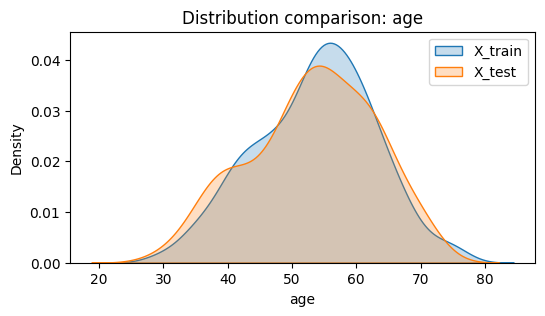

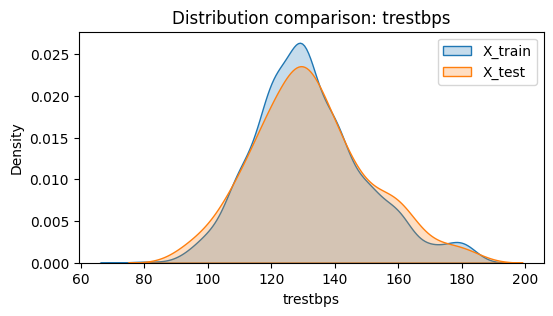

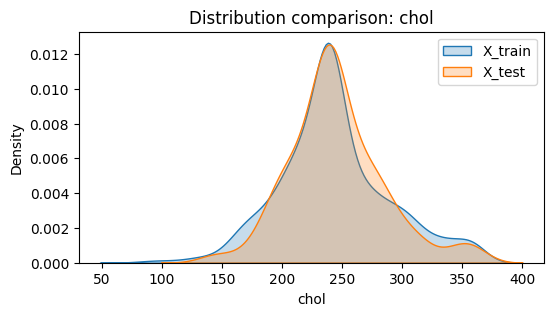

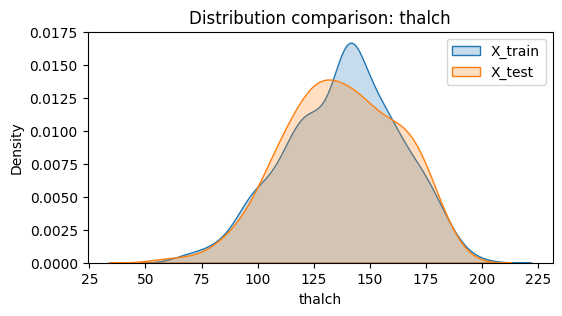

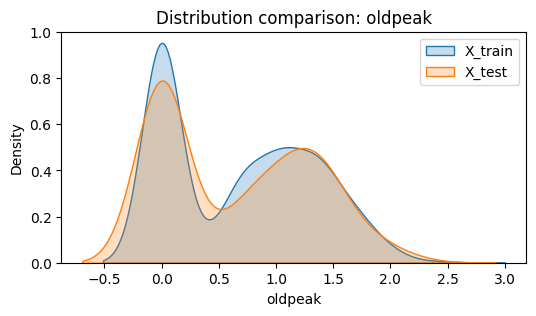

In [16]:
# ==========================================================
# Step 8: Verify train/test distributions for numeric features
# ==========================================================

numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak'] # "ca" was dropped

# Compare basic statistics between train and test
train_stats = X_train[numeric_cols].describe().T
test_stats = X_test[numeric_cols].describe().T

comparison = pd.concat([train_stats['mean'], test_stats['mean']], axis=1)
comparison.columns = ['train_mean', 'test_mean']

# Calculate relative difference (%)
comparison['diff_%'] = ((comparison['train_mean'] - comparison['test_mean'])
                        / comparison['train_mean'] * 100).round(2)

print("\nNumeric feature distribution check (train vs test):")
print(comparison)

# KDE plots to visually compare distributions
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.kdeplot(X_train[col], label='X_train', fill=True)
    sns.kdeplot(X_test[col], label='X_test', fill=True)
    plt.title(f'Distribution comparison: {col}')
    plt.legend()
    plt.show()

# Key insights:
# - Small differences in mean values are expected; large differences could indicate data drift.
# - KDE plots confirm train/test distributions are visually similar.
# - Ensures model will generalize without bias due to train/test mismatch.


In [21]:
# ==========================================================
# Saving plots
# ==========================================================

import os
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================================
# Requirements / Assumptions for Plotting
# ==========================================================
# 1. The DataFrame `df` must already exist and contain the following columns:
#    - Numeric: 'age', 'trestbps', 'chol', 'thalch', 'oldpeak'
#    - Categorical: 'cp', 'sex', 'fbs', 'restecg', 'exang', 'slope', 'thal'
#    - Target: 'target' (0 = no heart disease, 1 = heart disease)
# 2. All missing/impossible values should be handled prior to running this code.
# 3. Seaborn and Matplotlib libraries must be imported.
# 4. The output folder will be created automatically at:
#    '/content/drive/MyDrive/DsProjects/CardioPredict/plots/EDA'

# ---------------- Paths ----------------
plot_folder = '/content/drive/MyDrive/DsProjects/CardioPredict/plots/EDA'
os.makedirs(plot_folder, exist_ok=True)

# ---------------- Numeric feature distributions ----------------
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"{col.capitalize()} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(os.path.join(plot_folder, f"{col}_distribution.png"))
    plt.close()

# ---------------- Boxplots to check outliers by target ----------------
boxplot_features = ['chol', 'trestbps', 'thalch', 'oldpeak']

for col in boxplot_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f"{col.capitalize()} by Heart Disease")
    plt.xlabel("Heart Disease (0=No, 1=Yes)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(os.path.join(plot_folder, f"boxplot_{col}.png"))
    plt.close()

# ---------------- Categorical features vs target ----------------
categorical_features = ['cp', 'sex', 'fbs', 'restecg', 'exang', 'slope', 'thal']

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f"{col.capitalize()} vs Heart Disease")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Heart Disease")
    plt.tight_layout()
    plt.savefig(os.path.join(plot_folder, f"categorical_target_{col}.png"))
    plt.close()

# ---------------- Correlation heatmap ----------------
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, fmt=".2f",
            cmap='coolwarm', cbar=True)
plt.title("Numeric Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(plot_folder, "correlation_heatmap.png"))
plt.close()
